RTF to txt conversion done with [Multidoc converter](http://www.multidoc-converter.com/en/download/index.html)
![mdoc logo](http://www.multidoc-converter.com/en/_pics/80/logo_280x75_transparent.png)

## Challenge categories

1. Economy
2. Regulation
3. Environment
4. Health related issue
5. Industry
6. Cultures and customs


In [16]:
import tensorflow as tf

tf.__version__

'2.0.0-beta1'

In [75]:
from pathlib import Path
path = Path('dataset/wiki')


In [76]:
def filter_files(files, include=[], exclude=[]):
    for incl in include:
        files = [f for f in files if incl in f.name]
    for excl in exclude:
        files = [f for f in files if excl not in f.name]
    return sorted(files)

def ls(x, recursive=False, include=[], exclude=[]):
    if not recursive:
        out = list(x.iterdir())
    else:
        out = [o for o in x.glob('**/*')]
    out = filter_files(out, include=include, exclude=exclude)
    return out

Path.ls = ls

In [77]:
path.ls(include=['h5'])

[WindowsPath('dataset/wiki/dss_wiki_02000_20K1_maxp_flat.h5')]

In [14]:
model = tf.keras.models.load_model(path/'dss_wiki_02000_20K1_maxp_flat.h5')

W0721 19:32:08.154924 10980 deprecation.py:323] From C:\Users\emamorc\.conda\envs\tf20\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 500, 128)          27245056  
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 62, 128)           0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 7936)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 47622     
Total params: 27,292,678
Trainable params: 27,292,678
Non-trainable params: 0
_________________________________________________________________


In [17]:
path.ls('h5',include=['json'])

[WindowsPath('dataset/wiki/dss_wiki_00005_20K.json'),
 WindowsPath('dataset/wiki/dss_wiki_00010_20K.json'),
 WindowsPath('dataset/wiki/dss_wiki_00200_20K1.json'),
 WindowsPath('dataset/wiki/dss_wiki_02000_20K.json'),
 WindowsPath('dataset/wiki/dss_wiki_02000_20K1.json')]

In [22]:
import json

filename = 'dss_wiki_02000_20K1.json'

with open(path/filename, 'r', encoding='utf-8') as f:
  dss = json.load(f)

print(f"Dataset of {len(dss['X'])} texts of {len(set(dss['y']))} classes - vocabulary of {len(dss['word_index'])} words")
print(dss['categories'])

Dataset of 8977 texts of 6 classes - vocabulary of 212852 words
['Economy', 'Regulation', 'Environment', 'Health', 'Industry', 'Cultures']


In [23]:
dss['word_index']

{'xxxunk': 1,
 'the': 2,
 'of': 3,
 'and': 4,
 'in': 5,
 'to': 6,
 'a': 7,
 'is': 8,
 'for': 9,
 'as': 10,
 'that': 11,
 'by': 12,
 'on': 13,
 'are': 14,
 'with': 15,
 'or': 16,
 'be': 17,
 'was': 18,
 'from': 19,
 'an': 20,
 'it': 21,
 'this': 22,
 'which': 23,
 'at': 24,
 'have': 25,
 'also': 26,
 'not': 27,
 'has': 28,
 'can': 29,
 'their': 30,
 'health': 31,
 'such': 32,
 'other': 33,
 'were': 34,
 'more': 35,
 'they': 36,
 'may': 37,
 'its': 38,
 'been': 39,
 'one': 40,
 'these': 41,
 'used': 42,
 'new': 43,
 'but': 44,
 'his': 45,
 'he': 46,
 'than': 47,
 'some': 48,
 'public': 49,
 'all': 50,
 'use': 51,
 'there': 52,
 'into': 53,
 'when': 54,
 'many': 55,
 '1': 56,
 'water': 57,
 'who': 58,
 'between': 59,
 'most': 60,
 'first': 61,
 'states': 62,
 'had': 63,
 'time': 64,
 'united': 65,
 'system': 66,
 'world': 67,
 'through': 68,
 'research': 69,
 'would': 70,
 'will': 71,
 'government': 72,
 'social': 73,
 '–': 74,
 'state': 75,
 'over': 76,
 'about': 77,
 'people': 78,
 'mar

In [32]:
import numpy as np

number_of_words = len(dss['word_index'])
max_len = 500


X_arr = np.array(dss['X'])
y_arr = np.array(dss['y'])
ylabels = dss['categories']

id_to_word = {dss['word_index'][key]:key for key in dss['word_index'].keys()}
word_to_id = dss['word_index']

In [26]:
# Changing variable name to preserve orginal dataset
X_arr_p = tf.keras.preprocessing.sequence.pad_sequences(X_arr, maxlen=max_len)

In [30]:
import textwrap

texts=[]
size = 3
sample = np.random.choice(range(len(X_arr)),size)
predictions = model.predict_classes(X_arr_p[sample])
for idx,i in enumerate(sample):
    print(f'Review #{i} - P:{ylabels[predictions[idx]]},A:{ylabels[y_arr[sample[idx]]]}')
    s = ' '.join(id_to_word[id] for id in X_arr[i])
    texts.append(s)
    print('\n'.join(textwrap.wrap(s, width=100, replace_whitespace=False)))
    print()

Review #1291 - P:Economy,A:Economy
dr xxxunk xxxunk xxxunk is an indian investor trader based out of mumbai he is involved in the
market since he was 19 xxxunk and his company xxxunk securities xxxunk ltd are the largest
shareholder after the promoter in several listed companies xxxunk was a keynote speaker at xxxunk
xxxunk xxxunk bangalore he has also delivered a speech at the bombay stock exchange he has also
spoken at xxxunk xxxunk he was invited to speak at london business school he has been described by
the economic times as a market master in 2016 xxxunk xxxunk was conferred with a doctorate degree
for excellence in the field of management career xxxunk was born into a xxxunk family a family of
stockbrokers he realised his passion for stock market when he was 14 and he joined stock market when
he turned 19 he joined stock market not only because of his passion but because of xxxunk when his
father passed away to run the family he got into the family business of trading and stock 

In [52]:
new_texts = ([' '.join([s if s != 'xxxunk' else 'cazzo_ne_so' for s in text.split(' ')]) for text in texts])

In [57]:
X_new = np.array([[word_to_id[s] if s in word_to_id.keys() \
                                 else word_to_id['xxxunk'] for s in text.split(' ')] \
                                     for text in new_texts])
# Changing variable name to preserve orginal dataset
X_new_p = tf.keras.preprocessing.sequence.pad_sequences(X_new, maxlen=max_len)

In [61]:
predictions = model.predict_classes(X_new_p)
for i,p in enumerate(predictions):
    print(f'Sample #{i} - P:{ylabels[p]}')
    s = ' '.join(id_to_word[id] for id in X_new[i])
    texts.append(s)
    print('\n'.join(textwrap.wrap(s, width=100, replace_whitespace=False)))
    print()

Sample #0 - P:Economy
dr xxxunk xxxunk xxxunk is an indian investor trader based out of mumbai he is involved in the
market since he was 19 xxxunk and his company xxxunk securities xxxunk ltd are the largest
shareholder after the promoter in several listed companies xxxunk was a keynote speaker at xxxunk
xxxunk xxxunk bangalore he has also delivered a speech at the bombay stock exchange he has also
spoken at xxxunk xxxunk he was invited to speak at london business school he has been described by
the economic times as a market master in 2016 xxxunk xxxunk was conferred with a doctorate degree
for excellence in the field of management career xxxunk was born into a xxxunk family a family of
stockbrokers he realised his passion for stock market when he was 14 and he joined stock market when
he turned 19 he joined stock market not only because of his passion but because of xxxunk when his
father passed away to run the family he got into the family business of trading and stock xxxunk
xxxunk

RTF to txt conversion done with [Multidoc converter](http://www.multidoc-converter.com/en/download/index.html)
![mdoc logo](http://www.multidoc-converter.com/en/_pics/80/logo_280x75_transparent.png)

In [62]:
import re, string

In [89]:
s = '0123456789abcdeÂÂfghijklmnee  opqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$ % &\'()*sd +,-./:;<=>?@[\\]  f         ds^_`{|}~ \t\n\r\x0b\x0c'

' abcde fghijklmnee opqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ sd f ds '

In [109]:

path_txt = Path('dataset/txt')
files =  path_txt.ls(include=['txt'])
files[:10]

[WindowsPath('dataset/txt/100044.txt'),
 WindowsPath('dataset/txt/100264.txt'),
 WindowsPath('dataset/txt/101941.txt'),
 WindowsPath('dataset/txt/103834.txt'),
 WindowsPath('dataset/txt/104654.txt'),
 WindowsPath('dataset/txt/105161.txt'),
 WindowsPath('dataset/txt/107251.txt'),
 WindowsPath('dataset/txt/108208.txt'),
 WindowsPath('dataset/txt/109776.txt'),
 WindowsPath('dataset/txt/112414.txt')]

In [221]:
from progress import progress

pattern = re.compile('[^A-Za-z0-9]+')
#pattern = re.compile('[^A-Za-z]+')

pattern.sub(' ', s)
results = []
files_to_classify = files
for i,f in enumerate(files_to_classify):
    progress(i+1, len(files_to_classify), status=f)
    with open(f, 'r', encoding='utf-8') as content_file:
        # Read file content
        content = content_file.read()
        # keeps only alphanumerics
        text = pattern.sub(' ',content)
        # convert into numbers
        X = [word_to_id[s] if s in word_to_id.keys() \
               else word_to_id['xxxunk'] for s in text.split(' ')]
    
        # split the file into chunks of max_len words
        if len(X)>max_len:
            text_slices = zip(range(0,len(X),max_len),range(max_len,len(X),max_len))
        else:
            text_slices = [(0,len(X))]
        X_sliced=[]
        for i,j in text_slices:
            X_sliced.append(X[i:j])
        # padding
        X_sliced = tf.keras.preprocessing.sequence.pad_sequences(X_sliced, maxlen=max_len)
        
        # make predictions on the chunks of the file
        predictions = model.predict_classes(X_sliced)
                                            
#        plt.barh(dss['categories'],[len(predictions[predictions==i]) for i in range(len(dss['categories']))])
#        plt.title(f.name.split('.')[0])
#        plt.show()
            
        predictions_summary = [len(predictions[predictions==i]) for i in range(len(dss['categories']))]
        record = {cat:votes for cat,votes in (zip(dss['categories'],predictions_summary))} 
        record['label_n'] = np.argmax(predictions_summary)
        record['label_s'] = dss['categories'][record['label_n']]
        record['words'] = len(X)
        record['name'] = f.name.split('.')[0]
        
        # print(record)
        results.append(record)


In [214]:
import pandas as pd


In [222]:
output = pd.DataFrame(results)
output.head(10)

,Cultures,Economy,Environment,Health,Industry,Regulation,label_n,label_s,name,words
0,0,1,0,0,1,3,1,Regulation,100044,2735
1,1,0,0,0,0,0,5,Cultures,100264,621
2,1,0,2,0,1,13,1,Regulation,101941,8614
3,35,25,3,2,14,20,5,Cultures,103834,49901
4,0,0,3,0,0,3,1,Regulation,104654,3436
5,1,2,3,0,0,9,1,Regulation,105161,7858
6,0,2,0,1,1,4,1,Regulation,107251,4135
7,0,0,0,25,0,1,3,Health,108208,13259
8,0,0,0,3,0,4,1,Regulation,109776,3789
9,157,1,540,196,4,1,2,Environment,112414,449964


In [223]:
output.describe()

,Cultures,Economy,Environment,Health,Industry,Regulation,label_n,words
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,5.861454,5.275720,6.949246,8.482853,2.043896,8.026063,2.521262,18522.670782
std,21.663416,25.874103,38.343895,40.687870,7.665804,35.410786,1.619727,51076.434117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1508.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4349.000000
75%,4.000000,1.000000,3.000000,4.000000,1.000000,4.000000,4.000000,12711.000000
max,391.000000,342.000000,586.000000,705.000000,111.000000,533.000000,5.000000,587982.000000


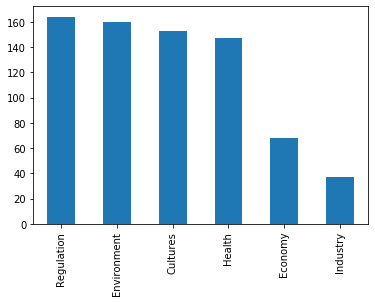

In [231]:
output['label_s'].value_counts().plot.bar()